<a href="https://colab.research.google.com/github/godsplan22/completed_projects_datascience/blob/main/Metro_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from  plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"


metro_data = pd.read_csv("/content/Delhi-Metro-Network.csv")

print(metro_data.head())


   Station ID         Station Name  Distance from Start (km)          Line  \
0           1             Jhil Mil                      10.3      Red line   
1           2  Welcome [Conn: Red]                      46.8     Pink line   
2           3          DLF Phase 3                      10.0   Rapid Metro   
3           4           Okhla NSIC                      23.8  Magenta line   
4           5           Dwarka Mor                      10.2     Blue line   

  Opening Date Station Layout   Latitude  Longitude  
0   2008-04-06       Elevated  28.675790  77.312390  
1   2018-10-31       Elevated  28.671800  77.277560  
2   2013-11-14       Elevated  28.493600  77.093500  
3   2017-12-25       Elevated  28.554483  77.264849  
4   2005-12-30       Elevated  28.619320  77.033260  


In [2]:
missing_values = metro_data.isnull().sum()

In [3]:
metero_data_types = metro_data.dtypes

In [4]:
missing_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [5]:
metero_data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [6]:
metro_data['Opening Date' ] = pd.to_datetime(metro_data['Opening Date'])

In [7]:
metero_data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [8]:
print(metro_data.head())

   Station ID         Station Name  Distance from Start (km)          Line  \
0           1             Jhil Mil                      10.3      Red line   
1           2  Welcome [Conn: Red]                      46.8     Pink line   
2           3          DLF Phase 3                      10.0   Rapid Metro   
3           4           Okhla NSIC                      23.8  Magenta line   
4           5           Dwarka Mor                      10.2     Blue line   

  Opening Date Station Layout   Latitude  Longitude  
0   2008-04-06       Elevated  28.675790  77.312390  
1   2018-10-31       Elevated  28.671800  77.277560  
2   2013-11-14       Elevated  28.493600  77.093500  
3   2017-12-25       Elevated  28.554483  77.264849  
4   2005-12-30       Elevated  28.619320  77.033260  


In [9]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}




In [10]:
delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=5)

# adding colored markers for each metro station with line name in tooltip
for index, row in metro_data.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip




In [11]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

In [12]:
print(metro_data)

     Station ID           Station Name  Distance from Start (km)  \
0             1               Jhil Mil                      10.3   
1             2    Welcome [Conn: Red]                      46.8   
2             3            DLF Phase 3                      10.0   
3             4             Okhla NSIC                      23.8   
4             5             Dwarka Mor                      10.2   
..          ...                    ...                       ...   
280         281             Bata Chowk                      38.3   
281         282       Dwarka Sector 12                       5.8   
282         283        Noida Sector 18                      43.6   
283         284      Knowledge Park II                      21.4   
284         285  Mayur Vihar Extention                      39.5   

             Line Opening Date Station Layout   Latitude  Longitude  \
0        Red line   2008-04-06       Elevated  28.675790  77.312390   
1       Pink line   2018-10-31       Elev

In [13]:
stations_per_year = metro_data.groupby('Opening Year').size().reset_index(name='Count')

# Plot the bar chart using Plotly
fig = px.bar(stations_per_year, x='Opening Year', y='Count',
             title='Number of Metro Stations Opened Each Year',
             labels={'Opening Year': 'Year', 'Count': 'Number of Stations'},
             color='Count', color_continuous_scale='Viridis')

fig.show()

i will now answer out many questions from the above analysis

Station Growth Over Time:

How many metro stations were opened each year?
Which year saw the highest number of station openings?
Line-Specific Analysis:

How many stations are there on each metro line?
Which metro line has the most stations?
Which metro line has the longest total distance?
Geographical Distribution:

What is the geographical distribution of metro stations across Delhi?
Which areas of Delhi have the highest density of metro stations?
Opening Dates and Patterns:

Are there specific periods (e.g., months or years) when more stations tend to be inaugurated?
What are the trends in station openings over the past decades?
Station Characteristics:

How many stations are elevated, underground, or at grade?
Are there patterns in the types of stations opened over time?
Accessibility and Connectivity:

Which stations serve as major interchange hubs?
How does the connectivity of different lines impact accessibility?
Distance Analysis:

What is the average distance between stations on each line?
Which lines have the shortest and longest average distances between stations?
Infrastructure Development:

How has the infrastructure (e.g., elevated vs. underground) evolved over the years?

In [14]:
stations_per_line = metro_data.groupby('Line').size().reset_index(name='Number of stations')


print("Number of stations on each metro line:")
print(stations_per_line)

Number of stations on each metro line:
                 Line  Number of stations
0           Aqua line                  21
1           Blue line                  49
2    Blue line branch                   8
3           Gray line                   3
4          Green line                  21
5   Green line branch                   3
6        Magenta line                  25
7         Orange line                   6
8           Pink line                  38
9         Rapid Metro                  11
10           Red line                  29
11        Voilet line                  34
12        Yellow line                  37


In [19]:
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].sum().reset_index()

longest_line = total_distance_per_line

In [20]:
print(" Line with the longest total distance")
print(longest_line)

 Line with the longest total distance
                 Line  Distance from Start (km)
0           Aqua line                     280.4
1           Blue line                    1281.1
2    Blue line branch                      32.0
3           Gray line                       5.4
4          Green line                     239.0
5   Green line branch                       3.2
6        Magenta line                     441.4
7         Orange line                      63.4
8           Pink line                    1093.4
9         Rapid Metro                      62.8
10           Red line                     480.2
11        Voilet line                     701.0
12        Yellow line                     794.1


In [22]:
from shapely.geometry import Point

In [23]:
import geopandas as gpd

In [24]:
geometry = [Point(xy) for xy in zip(metro_data['Longitude'], metro_data['Latitude'])]
gdf = gpd.GeoDataFrame(metro_data, geometry=geometry)

In [27]:
print (gdf.head())

   Station ID         Station Name  Distance from Start (km)          Line  \
0           1             Jhil Mil                      10.3      Red line   
1           2  Welcome [Conn: Red]                      46.8     Pink line   
2           3          DLF Phase 3                      10.0   Rapid Metro   
3           4           Okhla NSIC                      23.8  Magenta line   
4           5           Dwarka Mor                      10.2     Blue line   

  Opening Date Station Layout   Latitude  Longitude  Opening Year  \
0   2008-04-06       Elevated  28.675790  77.312390          2008   
1   2018-10-31       Elevated  28.671800  77.277560          2018   
2   2013-11-14       Elevated  28.493600  77.093500          2013   
3   2017-12-25       Elevated  28.554483  77.264849          2017   
4   2005-12-30       Elevated  28.619320  77.033260          2005   

                    geometry  
0  POINT (77.31239 28.67579)  
1  POINT (77.27756 28.67180)  
2  POINT (77.09350 28.4

In [28]:
fig = px.scatter_mapbox(gdf,
                        lat=gdf.geometry.y,
                        lon=gdf.geometry.x,
                        hover_name="Station Name",
                        hover_data=["Line", "Opening Year"],
                        color="Line",
                        zoom=10,
                        height=600)

fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 28.6139, "lon": 77.2090}) # Centered on Delhi
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns



<ipython-input-34-ed7dbe88e571>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




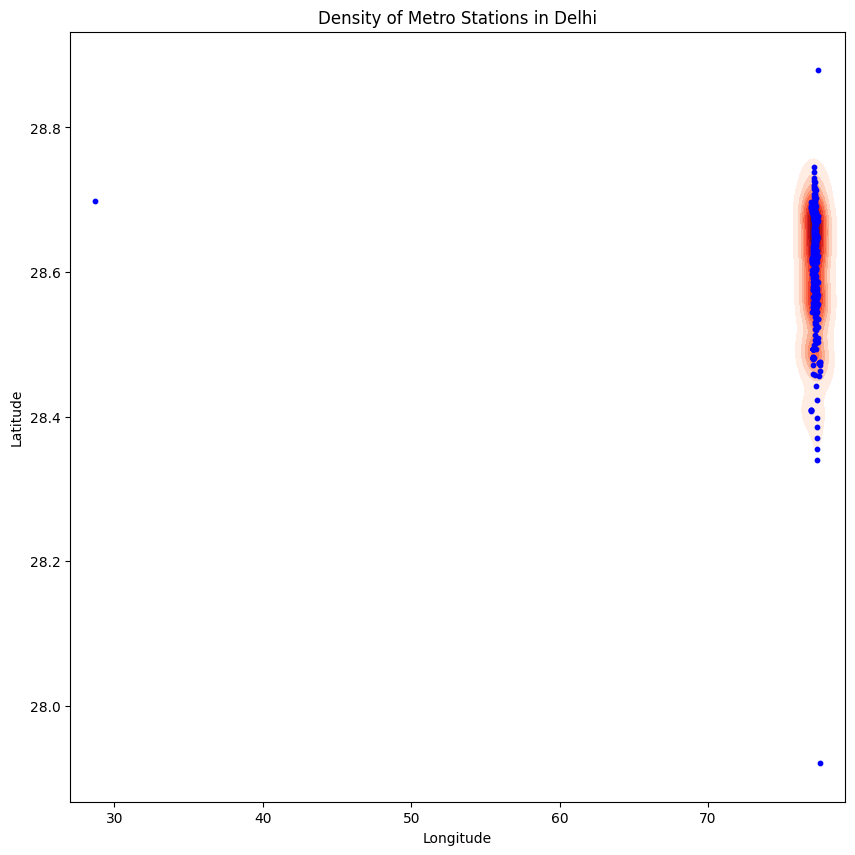

In [34]:
plt.figure(figsize=(10, 10))
sns.kdeplot(x=gdf.geometry.x, y=gdf.geometry.y, cmap="Reds", shade=True, bw_adjust=0.5)
plt.scatter(gdf.geometry.x, gdf.geometry.y, c='blue', s=10)
plt.title('Density of Metro Stations in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

In [37]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year
metro_data['Opening Month'] = metro_data['Opening Date'].dt.month


In [38]:
stations_per_year = metro_data.groupby('Opening Year').size().reset_index(name='Number of stations')

In [40]:
stations_per_month = metro_data.groupby(['Opening Year','Opening Month']).size().reset_index(name='Number of stations')

In [42]:
print (stations_per_year)
print (stations_per_month)

    Opening Year  Number of stations
0           2002                   6
1           2003                   4
2           2004                  11
3           2005                  28
4           2006                   9
5           2008                   3
6           2009                  17
7           2010                  54
8           2011                  13
9           2013                   5
10          2014                   3
11          2015                  13
12          2017                  18
13          2018                  64
14          2019                  37
    Opening Year  Opening Month  Number of stations
0           2002             12                   6
1           2003              3                   4
2           2004              3                   7
3           2004             12                   4
4           2005              3                   6
5           2005             12                  22
6           2006              1             

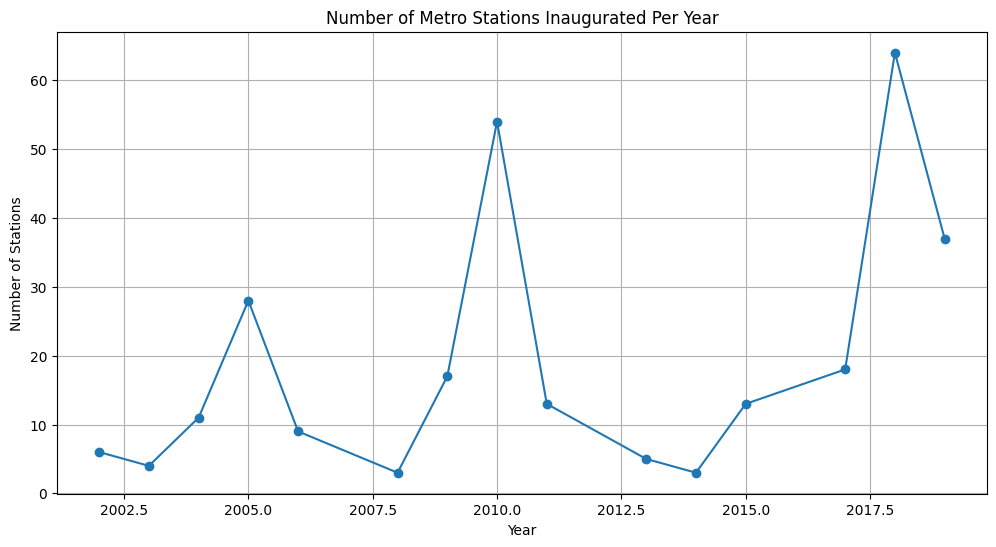

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(stations_per_year['Opening Year'], stations_per_year['Number of stations'], marker='o')
plt.title('Number of Metro Stations Inaugurated Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

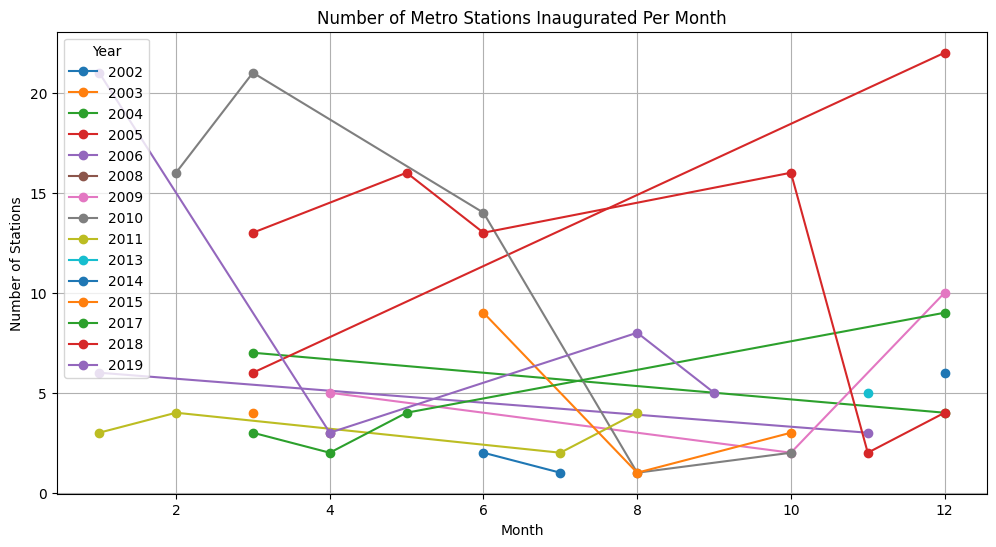

In [46]:
# Plotting the trends within each year
plt.figure(figsize=(12, 6))
for year in stations_per_month['Opening Year'].unique():
    data = stations_per_month[stations_per_month['Opening Year'] == year]
    plt.plot(data['Opening Month'], data['Number of stations'], marker='o', label=year)
plt.title('Number of Metro Stations Inaugurated Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Stations')
plt.legend(title='Year')
plt.grid(True)
plt.show()

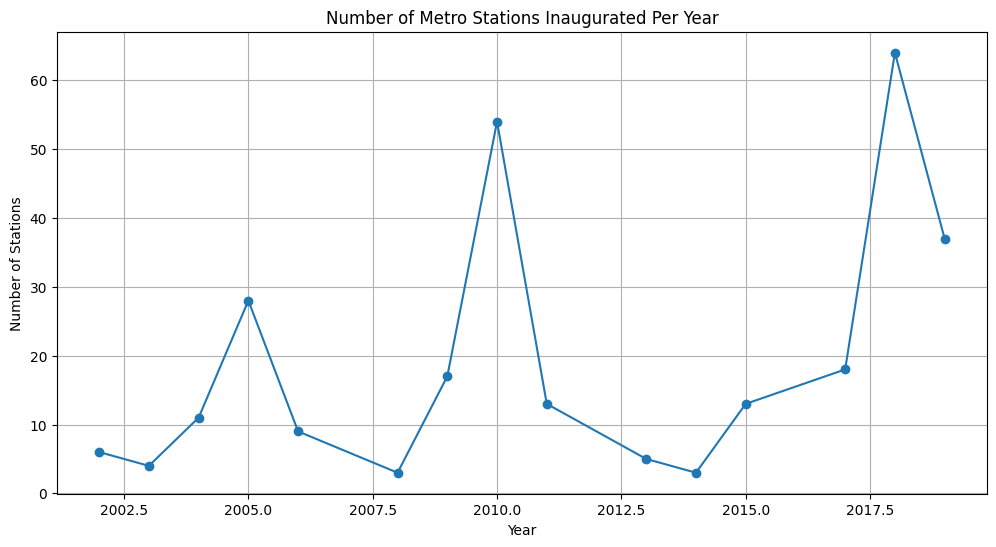

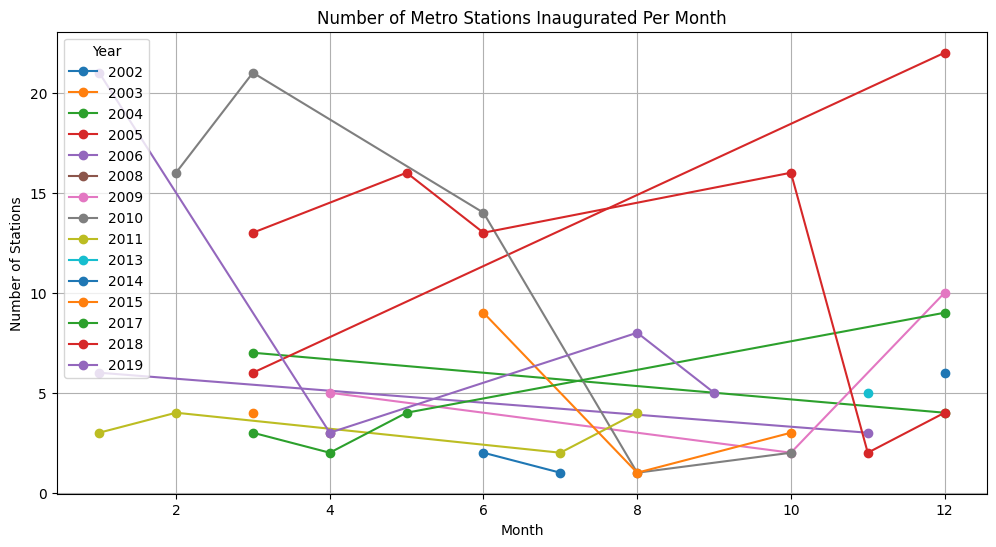

In [48]:
# Plotting the trends over years
plt.figure(figsize=(12, 6))
plt.plot(stations_per_year['Opening Year'], stations_per_year['Number of stations'], marker='o')
plt.title('Number of Metro Stations Inaugurated Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

# Plotting the trends within each year
plt.figure(figsize=(12, 6))
for year in stations_per_month['Opening Year'].unique():
    data = stations_per_month[stations_per_month['Opening Year'] == year]
    plt.plot(data['Opening Month'], data['Number of stations'], marker='o', label=year)
plt.title('Number of Metro Stations Inaugurated Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Stations')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [51]:
year_of_inauguration = metro_data.groupby('Opening Year')('Station Layout').sum().reset_index()

TypeError: 'DataFrameGroupBy' object is not callable

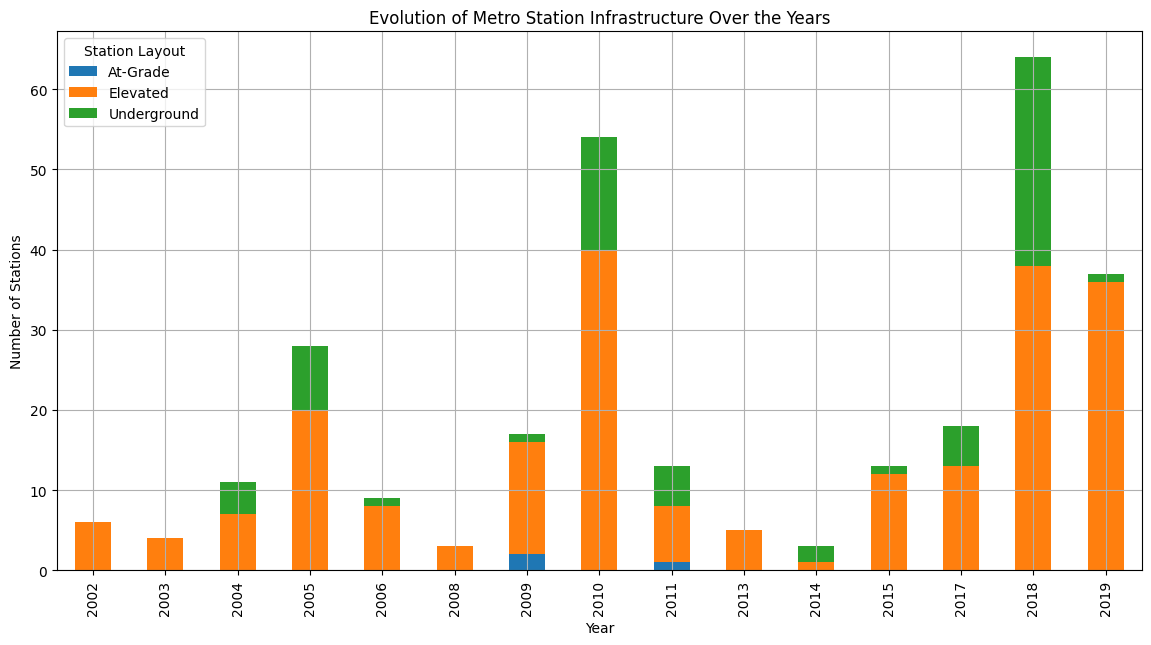

In [54]:
# Group by year and station layout to count the number of each type of station
stations_per_layout_year = metro_data.groupby(['Opening Year', 'Station Layout']).size().unstack(fill_value=0)

# Reset index is not necessary in this case, but if you want a DataFrame with reset index
stations_per_layout_year_reset = stations_per_layout_year.reset_index()

# Plotting the trends over years with a stacked bar plot
stations_per_layout_year.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Evolution of Metro Station Infrastructure Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.legend(title='Station Layout')
plt.grid(True)
plt.show()


In [55]:
avg_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].mean().reset_index()

In [56]:
print(avg_distance_per_line)

                 Line  Distance from Start (km)
0           Aqua line                 13.352381
1           Blue line                 26.144898
2    Blue line branch                  4.000000
3           Gray line                  1.800000
4          Green line                 11.380952
5   Green line branch                  1.066667
6        Magenta line                 17.656000
7         Orange line                 10.566667
8           Pink line                 28.773684
9         Rapid Metro                  5.709091
10           Red line                 16.558621
11        Voilet line                 20.617647
12        Yellow line                 21.462162
